### Aula18 - Análise de Componentes Principais

###### opencv  tutorial : Introduction to Principal Component Analysis (PCA)

In [1]:
import cv2  as cv
import numpy as np
import matplotlib.pyplot as plt
from math import atan2,cos,sin,sqrt,pi

In [2]:
def drawAxis(img, p_, q_, colour, scale):
    p = list(p_)
    q = list(q_)
    
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)

In [3]:
def getOrientation(pts, img):
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)
    for i in range(data_pts.shape[0]):
        data_pts[i,0] = pts[i,0,0]
        data_pts[i,1] = pts[i,0,1]
    
    # Perform PCA analysis
    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv.PCACompute2(data_pts, mean)
    
    #print('mean:', mean,'\n','autovetores:',eigenvectors,'\n','autovalores:',eigenvalues)
    
    # Store the center of the object
    cntr = (int(mean[0,0]), int(mean[0,1]))
    
    
    cv.circle(img, cntr, 3, (255, 0, 255), 2)
    p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0,0], cntr[1] + 0.02 * eigenvectors[0,1] * eigenvalues[0,0])
    p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1,0], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1,0])
    drawAxis(img, cntr, p1, (0, 255, 0), 1)
    drawAxis(img, cntr, p2, (255, 255, 0), 5)
    angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
    
    return angle

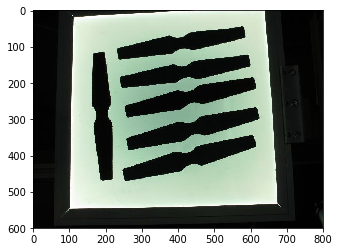

In [5]:
src = cv.imread('pca_test1.jpg')
plt.imshow(src)

In [6]:
#Convert image to gray escale
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
# Convert image to binary
_,bw = cv.threshold(gray, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
contours,_ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

In [7]:
for i, c in enumerate(contours):
    # Calculate the area of each contour
    area = cv.contourArea(c)
    # Ignore contours that are too small or too large
    if area < 1e2 or 1e5 < area:
        continue
    # Draw each contour only for visualisation purposes
    cv.drawContours(src, contours, i, (0, 0, 255), 2)
    # Find the orientation of each shape
    getOrientation(c, src)
    

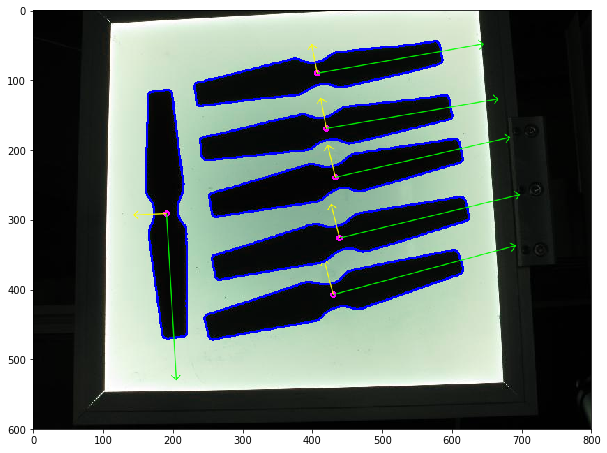

In [8]:
plt.figure(figsize = (10,10))
plt.imshow(src)

#### Descrição dos passos :
* Carrega imagem e converte para escala de cinza
* Binariza a imagem
* Obtém a matriz de contornos
* Desenha os contornos e chama a função de orientação pelos parâmetros contorno da iter. e imagem
* Na func. de orient. cria um array com os pontos do contorno
* Chama a função de PCA para obter o vetor da média, dos autovetores  e dos autovalores
* Determina os pontos de orientação de cada conjunto de pontos a partir  de seus autovalores e autovetores (A*x = λ*x)
* Retorna o ângulo de orientação
* Chama a função de desenho